In [1]:
# Import Libraries @@GauravLute@@
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Series
#from pmdarima import auto_arima

In [ ]:
series = pd.read_csv('city_day.csv')
series.head()
# Load dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
series_delhi = series.loc[series['City']=='Delhi']
series_delhi.head()
# Chooses particular delhi city

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [ ]:
ts_delhi = series_delhi[['Date', 'AQI']]
ts_delhi.head()
# choose specific columns

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0
10232,2015-01-04,319.0
10233,2015-01-05,325.0


In [5]:
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])

C:\Users\Gaurav Lute\AppData\Local\Temp\ipykernel_5560\2632880984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])


In [ ]:
# drop null values
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()

Date    0
AQI     0
dtype: int64

In [7]:
ts_delhi = ts_delhi.set_index('Date')

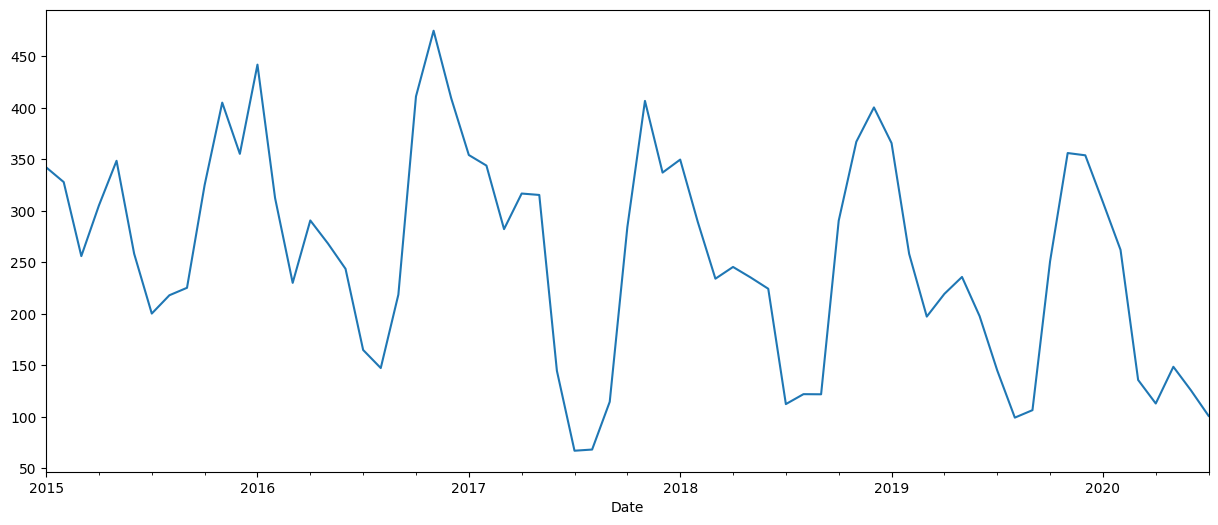

In [10]:
ts_month_avg = ts_delhi['AQI'].resample('MS').mean()
ts_month_avg.plot(figsize = (15, 6))
plt.show()

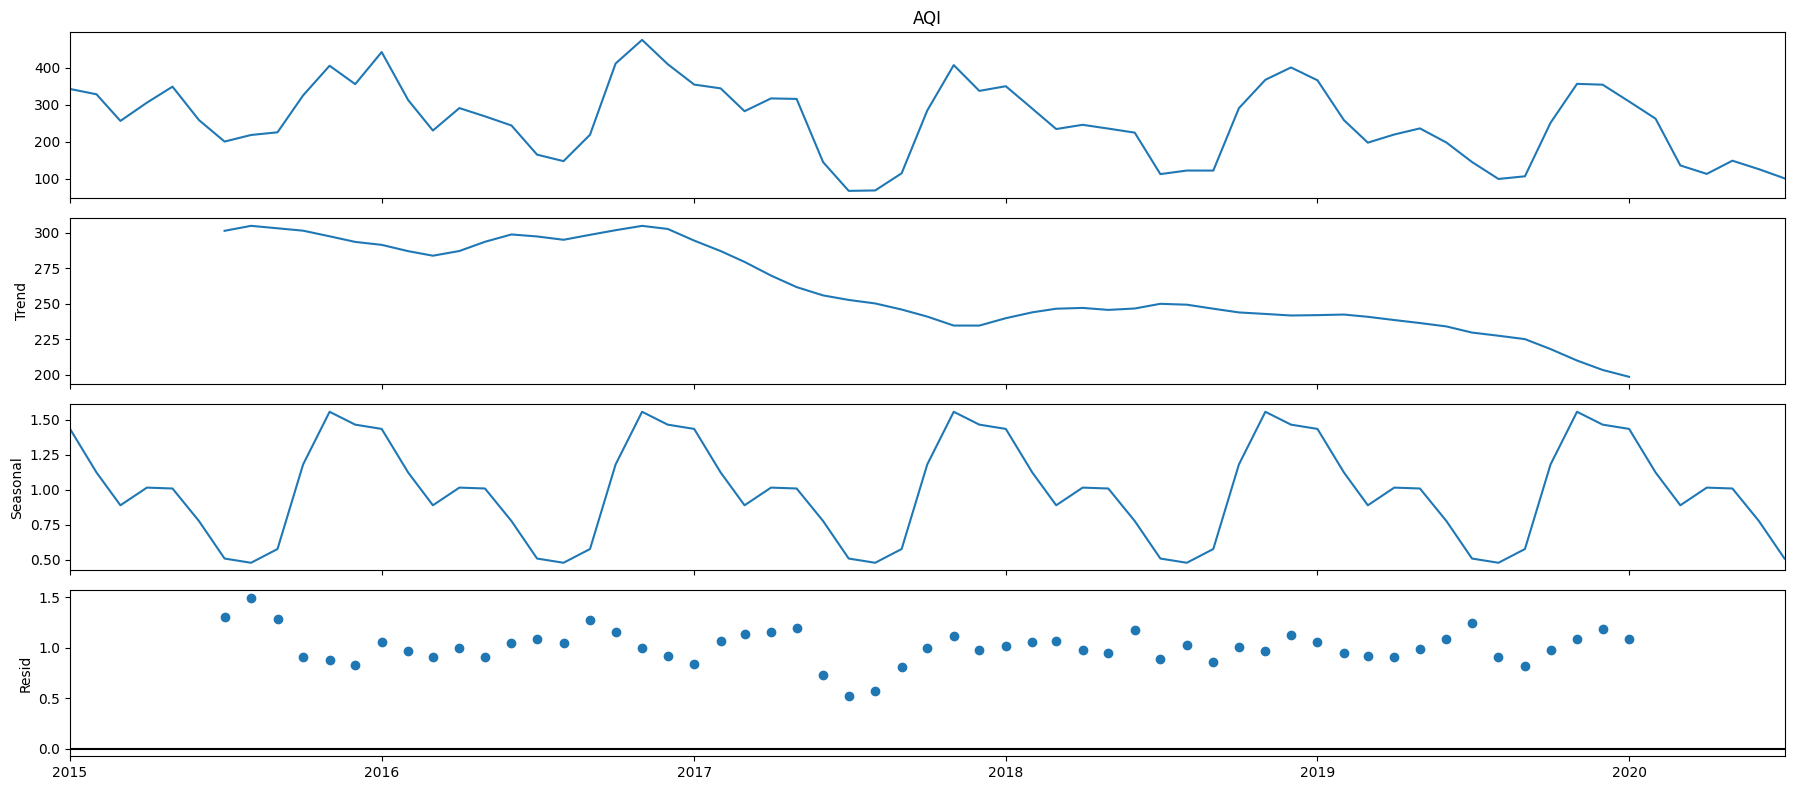

In [ ]:
# perform multiplicatiive seasonal decomposition 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
# pedrform adfuller test to check series is stationary or not p-value > 0.05 the given series is stationary
adf_test = adfuller(ts_month_avg)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @0.05: %.2f' %adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.229024
Critical Values @0.05: -2.92
p-value: 0.973843


In [ ]:
# create a difference function
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [20]:
ts_t_adj = difference(ts_month_avg)

C:\Users\Gaurav Lute\AppData\Local\Temp\ipykernel_5560\576886149.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset[i] - dataset[i - interval]


In [ ]:
ts_t_adj = ts_t_adj.dropna()  #drop null values

<Axes: >

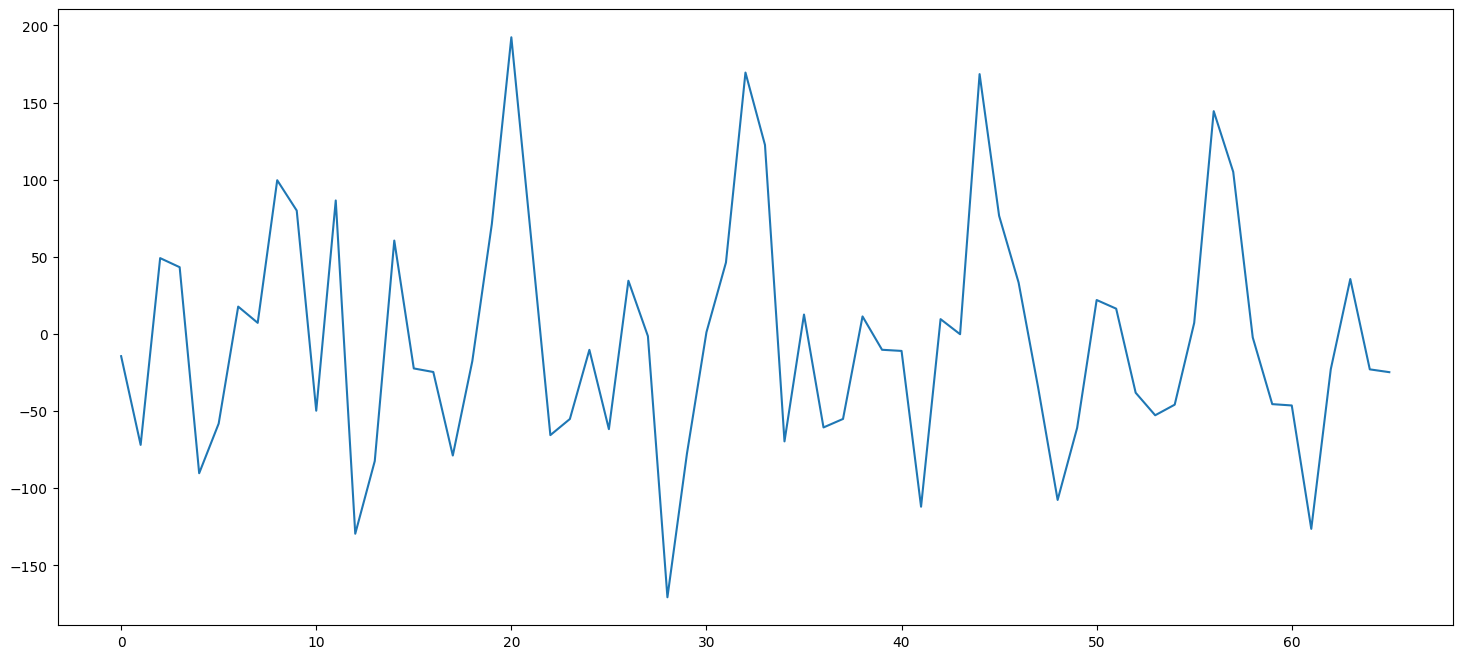

In [ ]:
# visualize the plot 
ts_t_adj.plot()

In [ ]:
# perform adf test
adf_test = adfuller(ts_t_adj)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.795995
Critical Values @ 0.05: -2.92
p-value: 0.000000


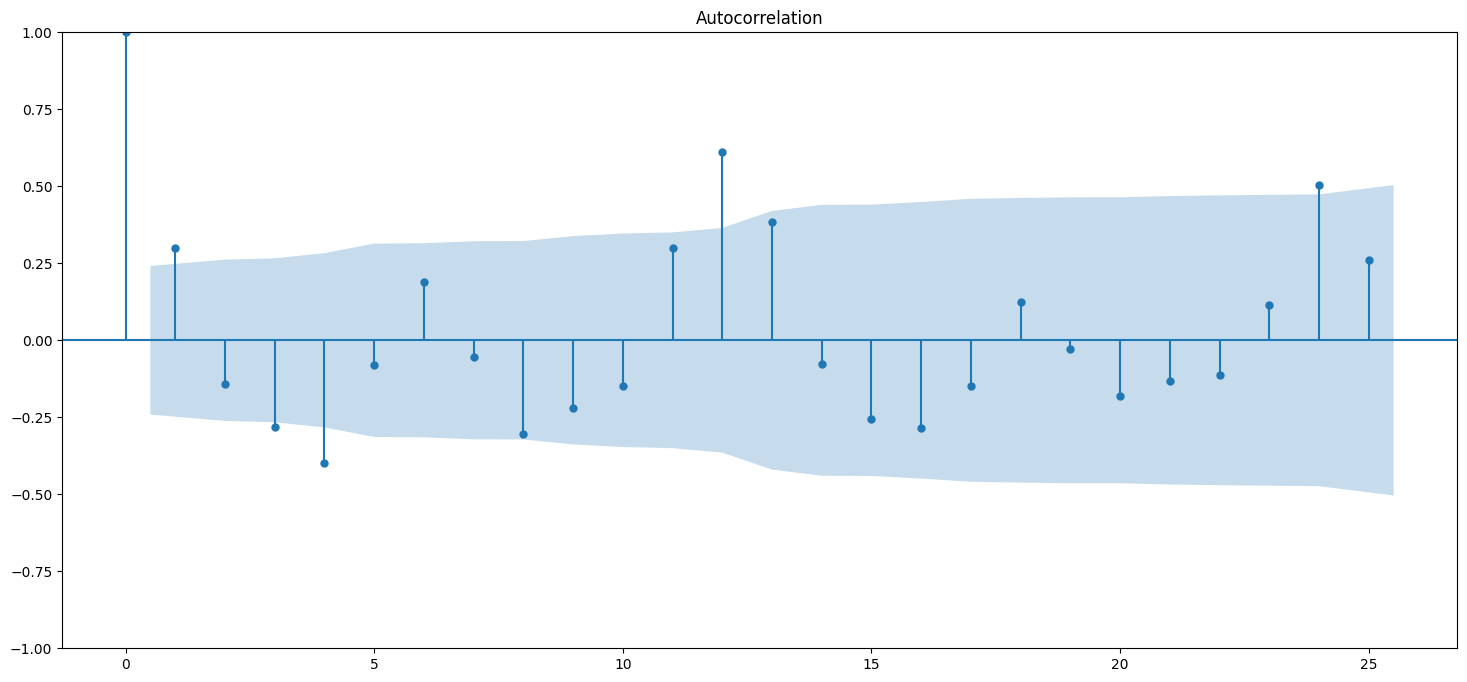

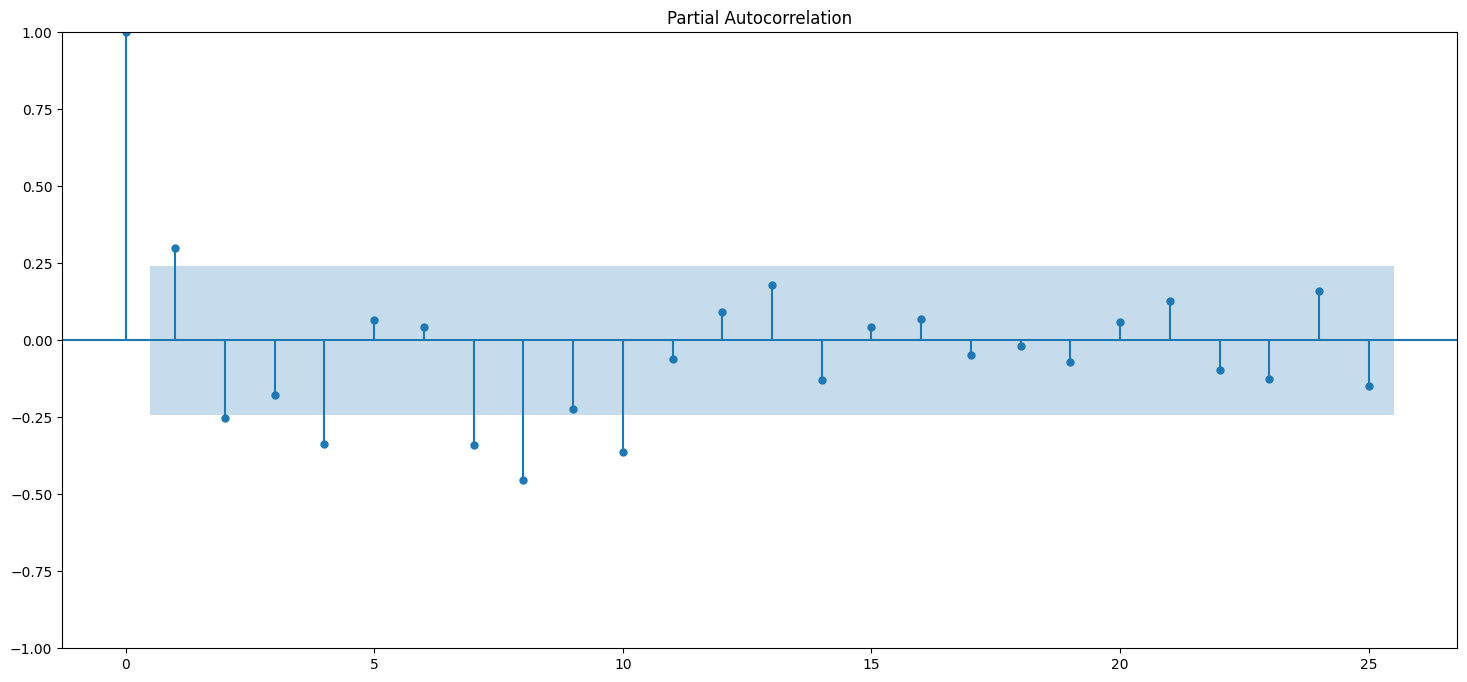

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj,lags=25)
plot_pacf(ts_t_adj,lags=25)
plt.show()

In [ ]:
train = ts_month_avg[0:54] #split the datasets
test = ts_month_avg[54:]
print('Train Timeseries Range => ', train.index.min(), ' - ' , train.index.max())
print('Test Timeseries Range => ', test.index.min(), ' - ' , test.index.max())

Train Timeseries Range =>  2015-01-01 00:00:00  -  2019-06-01 00:00:00
Test Timeseries Range =>  2019-07-01 00:00:00  -  2020-07-01 00:00:00


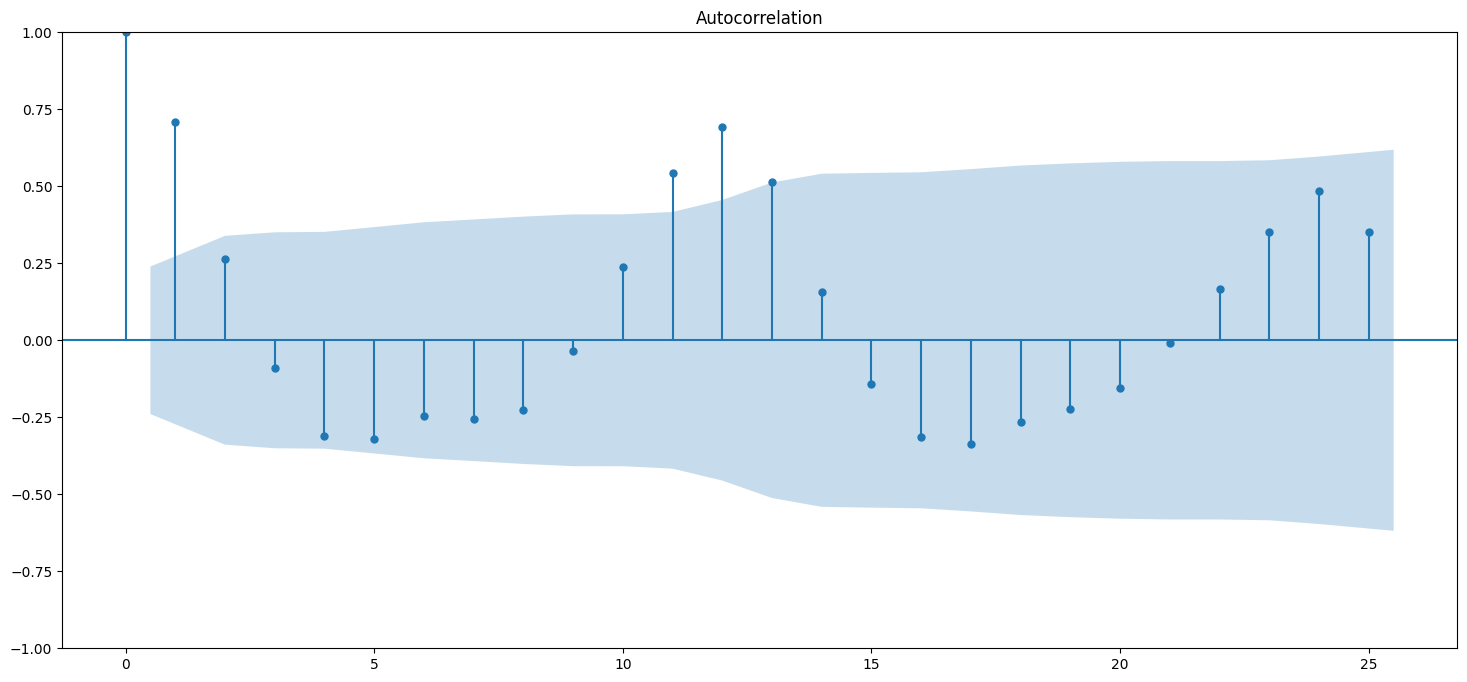

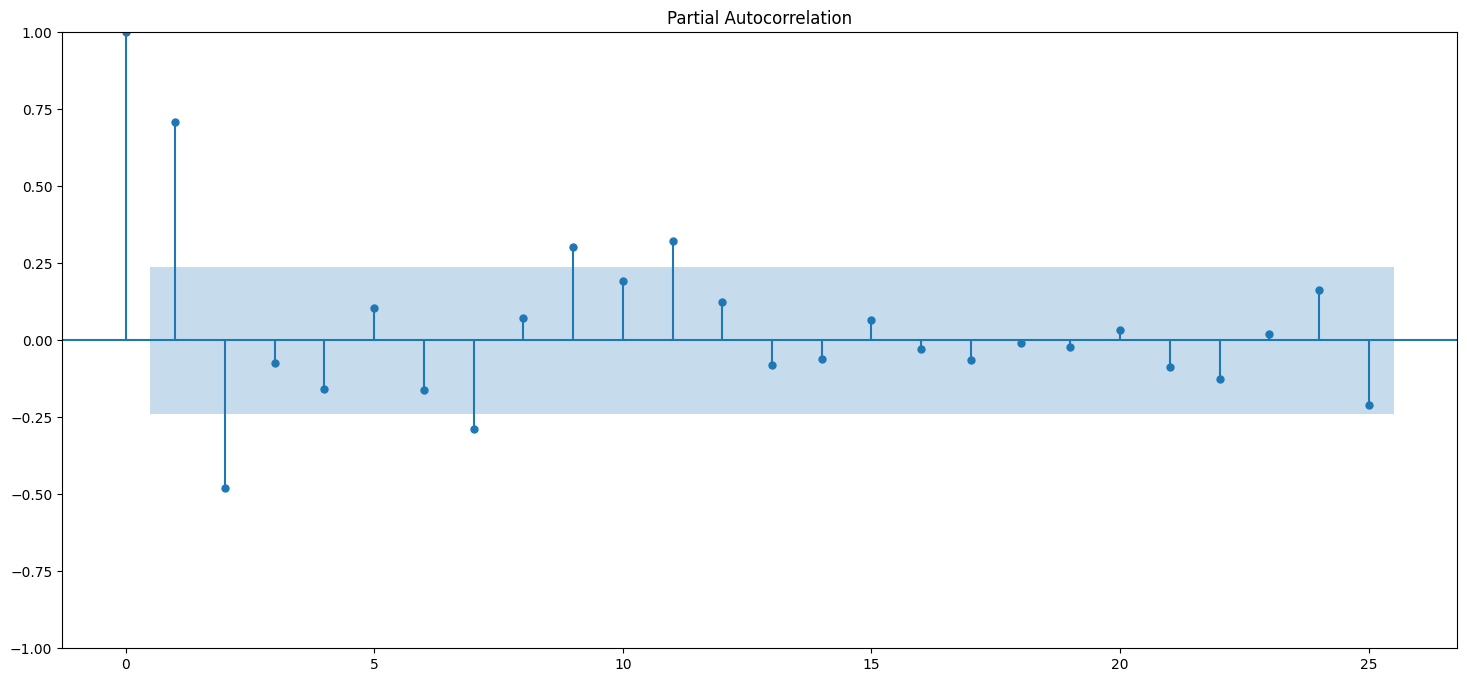

In [26]:
plot_acf(ts_month_avg,lags=25)
plot_pacf(ts_month_avg,lags=25)
plt.show()

In [ ]:
# Developed Sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train,order=(1,1,1), seasonal_order=(1,0,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False,)

In [ ]:
fitted = sarima.fit()  # fit given sarimax model
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -202.621
Date:                            Mon, 19 May 2025   AIC                            415.243
Time:                                    16:11:41   BIC                            423.561
Sample:                                01-01-2015   HQIC                           418.227
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4705      0.221      2.126      0.034       0.037       0.904
ma.L1         -1.0000   5068.407   

In [ ]:
# predict future values
pred_test = fitted.predict(start=test.index.min(), end=test.index.max())


In [30]:
pred_test


2019-07-01    108.937050
2019-08-01    104.261965
2019-09-01    129.514668
2019-10-01    270.469487
2019-11-01    347.573555
2019-12-01    311.647910
2020-01-01    314.989298
2020-02-01    247.692036
2020-03-01    183.130572
2020-04-01    213.222649
2020-05-01    217.018175
2020-06-01    155.935887
2020-07-01     82.266482
Freq: MS, Name: predicted_mean, dtype: float64

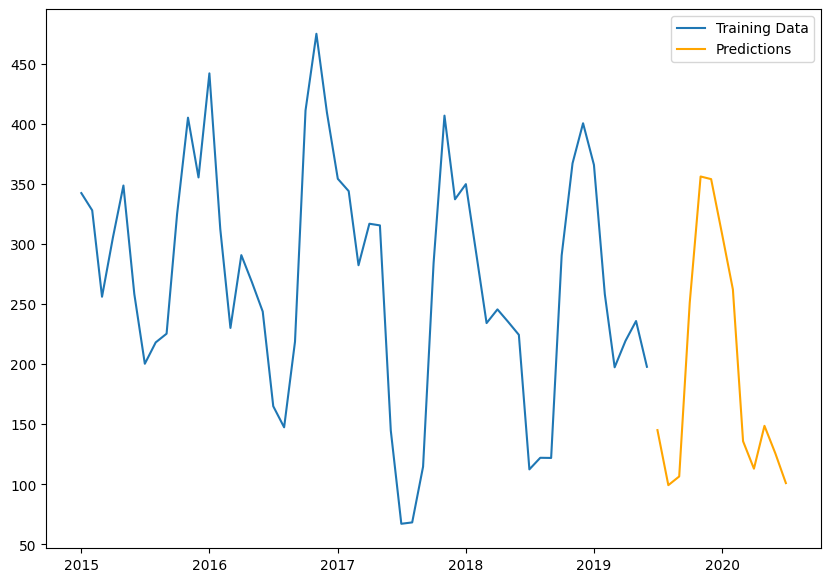

In [31]:
plt.figure(figsize=(10,7))
plt.plot(train.index,train,label='Training Data')
plt.plot(test.index,test, label='Predictions', color='orange')
plt.legend()
plt.show()

In [32]:
ts_month_avg

Date
2015-01-01    342.290323
2015-02-01    327.928571
2015-03-01    256.064516
2015-04-01    305.266667
2015-05-01    348.580645
                 ...    
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: AQI, Length: 67, dtype: float64

In [ ]:
# predicted values
pred_future = fitted.get_prediction(start=pd.to_datetime('2020-08-01'),end=pd.to_datetime('2020-11-01') ,dynamic=False)


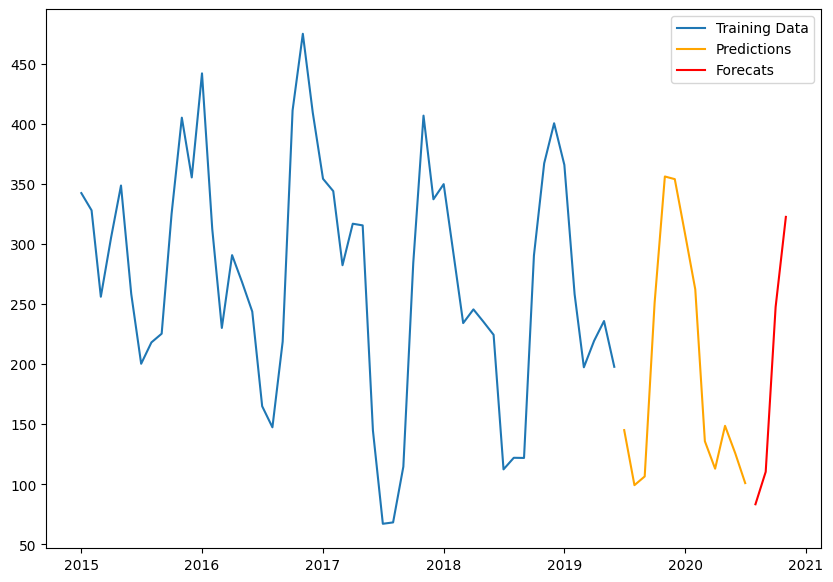

In [34]:
plt.figure(figsize=(10,7))
plt.plot(train.index,train,label='Training Data')
plt.plot(test.index,test, label='Predictions', color='orange')
plt.plot(pred_future.predicted_mean.index,pred_future.predicted_mean.values, label='Forecats', color='red')
plt.legend()
plt.show()

In [ ]:
# check model performance
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred_test,test)
print(mae)

32.320856063397414


In [36]:
test.mean()

np.float64(192.82541570405863)

In [ ]:
sarima_model = auto_arima(train, start_p=0, start_q=0,
                      max_p=12, max_q=12,
                      m=12,             
                      d=None,             
                      start_P=1,
                      start_Q=1,
                      max_P=10,
                      max_Q=10,
                      test='adf',         # use adftest to find optimal 'd'
                      D=None, 
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False,
                         information_criterion='aic')

In [ ]:
print(sarima_model.summary())


In [ ]:
auto=SARIMAX(train,order=(1,0,1), seasonal_order=(2,0,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False,)

In [ ]:
fitted_2 = auto.fit()


In [ ]:
pred_test_new = fitted_2.predict(start=test.index.min(), end=test.index.max())


In [ ]:
pred_test_new


In [39]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred_test_new,test)
print(mae)

NameError: name 'pred_test_new' is not defined